#+TITLE: Double Descent
#+CATEGORIES: optimization
#+TAGS: theory
#+DESCRIPTION: A phenomena where generalization gets worse then better with larger models and bigger datasets.
#+AUTHORS: Preetum Nakkiran, Gal Kaplun, Yamini Bansal, Tristan Yang, Boaz Barak, Ilya Sutskever
#+SOURCE: https://arxiv.org/abs/1912.02292
#+DATE: 2024-01-31

# Double Descent

Double descent is a well known phenomena in deep learning that explains the curious effect that model and dataset size has on generalization performance. Classical statistical wisdom purports that small models underfit, large models overfit, and the ideal size is somewhere in the middle. However, modern machine learning methods have shown that as models become very large, the extreme overparameterization can actually lead to models that generalize better. It turns out that there is a critical region where increased model size actually results in worse performance before subsequently improving. 

This phenomena also appears with increasing dataset size and training length. The double descent phenomena exhibits a generalized relation to this notion of effective model complexity, which is the maximum number of samples on which a model can achieve a training error near zero. Consider a training procedure $\mathcal{T}$ that takes an input set $S = \{(x_1, y_1), ..., (x_n, y_n)\}$ of training samples. The effective model complexity with respect to a distribution $\mathcal{D}$ can be defined as:

$$
EMC_{\mathcal{D}, \epsilon}(\mathcal{T}) := max\{ n | \mathbb{E}_{S \sim \mathcal{D}^n} [Error_{S}(\mathcal{T}(S))] \leq \epsilon \}
$$

Model behavior becomes atypical in an interpolation region where the number of training samples is comparable to the effective model complexity.

In [300]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('./deadneuron.mplstyle')

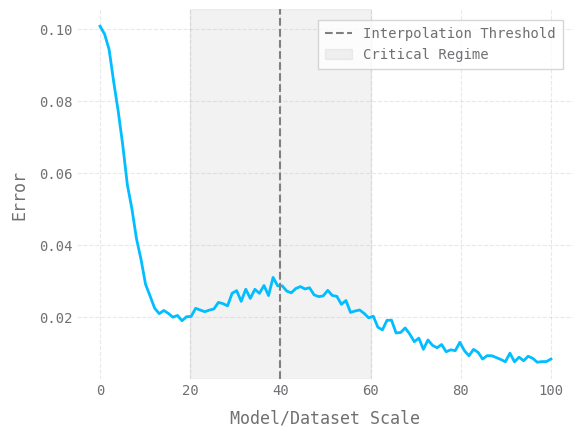

In [301]:
# An approximation of a double descent curve with piecewise gaussians
def gaussian(x, mu, sig):
    return (1.0  / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)) + np.random.normal(0, 0.001, size=x.shape)
    
def double_descent(x):
    descent1 = gaussian(x[:20], 0, 5)+0.02
    descent2 = gaussian(x[20:], 40, 20)+0.008
    
    return np.concatenate((descent1, descent2))

x = np.linspace(0, 100, 100)
plt.plot(x, double_descent(x))

plt.axvline(40, color='grey', linestyle='--', linewidth='1.5', label="Interpolation Threshold")
plt.axvspan(20, 60, alpha=0.1, color='grey', label='Critical Regime')

plt.xlabel('Model/Dataset Scale')
plt.ylabel('Error')
plt.xlabel('Model/Dataset Scale')
plt.ylabel('Error')

plt.legend()
plt.show()